In [1]:
import numpy as np
import pandas as pd
 
data=pd.read_csv(r"Boston.csv")
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null int64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null int64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.4 KB


In [3]:
data.duplicated().any()
 
#
False

False

In [4]:
class LinearRegression:
    """使用Python实现的线性回归。（最小二乘法）"""
        
    def fit(self,X,y):
        """根据提供的训练数据X，对模型进行训练
        Parameters
        ___
        X：类数组类型。形状：[样本数量，特征数量]
               特征矩阵，用来对模型进行训练
        y：类数组类型，新装：[样本数量]
            
        """
        # 说明，如果X是数组对象的一部分，而不是完整的对象数据例如，X是由其他对象通过切片传递过来的
        # 则无法完成矩阵转化
        # 这里创建X的拷贝对象，避免转换矩阵失败
        X=np.asmatrix(X.copy())
        # y是一维结构，行向量或列向量，一维结构可以不用进行拷贝
        # 注意：进行矩阵预算，需要是二维的结构，解决的方式是：reshape(-1,1)，二维矩阵
        y=np.asmatrix(y).reshape(-1,1)# -1 表示行数，行数可以自动计算，1是1列，
      
        #矩阵的计算与ndarray计算不一样
        # X.T 表示X的转置
        # .I,表示逆
        self.w_=(X.T*X).I*X.T*y
        
    def predit(self,X):
        """不考虑截距w0，根据参数传递的样本X，对样本数据进行预测。
        
        Parameters
        ————
        X:类数组类型。形状:[样本数量，特征数量]
         待预测的样本特征（属性）
        
        Retruns
        ————
        result:数组类型
            预测的结果。
        """
        
        X=np.asmatrix(X.copy())
        result=X*self.w_
        # 将矩阵转换成ndarray数组，进行扁平化处理，然后返回结果。扁平化的作用：将多维转换成一维
        return np.array(result).ravel()

In [5]:
t=data.sample(len(data),random_state=0)
train_X=t.iloc[:400,:-1]
train_y=t.iloc[:400,-1]
 
test_X=t.iloc[400:,:-1]
test_y=t.iloc[400:,-1]
 
lr=LinearRegression()
lr.fit(train_X,train_y)
result=lr.predit(test_X)
#display(result)
display(np.mean((result-test_y)**2))

17.011905533633218

In [6]:
display(lr.w_)

matrix([[-9.32859692e-02],
        [ 4.39664692e-02],
        [ 5.72354432e-03],
        [ 2.41509608e+00],
        [-3.31988921e+00],
        [ 5.59119871e+00],
        [-2.18905524e-03],
        [-8.57221736e-01],
        [ 2.28120616e-01],
        [-1.18896061e-02],
        [-2.52710238e-01],
        [ 1.49077626e-02],
        [-4.56116634e-01]])

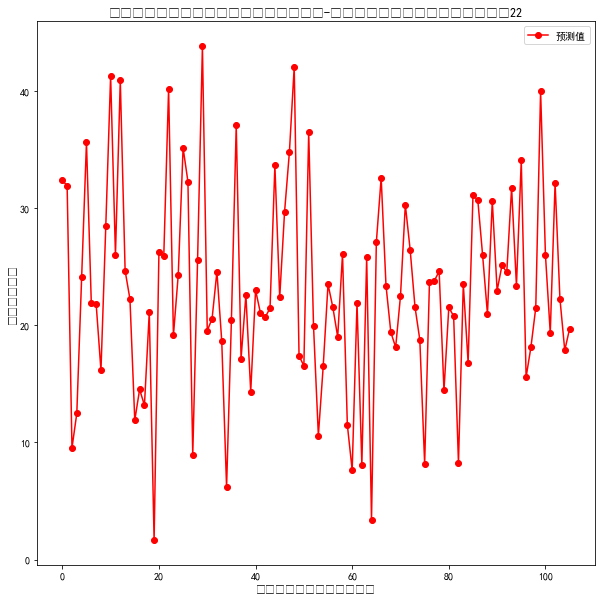

In [9]:
# -*- coding:utf-8 -*-
import matplotlib as mpl
import matplotlib.pyplot as plt
 
import sys
reload(sys)
sys.setdefaultencoding('utf-8') 
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
plt.figure(figsize=(10,10))
 
plt.plot(result,"ro-",label="预测值")
plt.title("线性回归预测-最小二乘法22")
plt.xlabel("样本序号")
plt.ylabel("房价")
plt.legend()
plt.show()

In [10]:
t=data.sample(len(data),random_state=0)
# 加在末尾
#t["Intercept"]=1
# 加在第一列
new_columns=t.columns.insert(0,"Intercept")
# 更新列的信息，Nan的位置填充默认信息为1
t=t.reindex(columns=new_columns,fill_value=1)
#填充方式2
#t["Intercept"]=1

In [11]:
train_X=t.iloc[:400,:-1]
train_y=t.iloc[:400,-1]
 
test_X=t.iloc[400:,:-1]
test_y=t.iloc[400:,-1]
 
lr=LinearRegression()
lr.fit(train_X,train_y)
result=lr.predit(test_X)
#display(result)

In [12]:
display(np.mean((result-test_y)**2))

17.097531384667725

In [13]:
import numpy as np
import pandas as pd
 
data=pd.read_csv(r"Boston.csv")
data.info(0)

In [14]:
class LinearRegression:
    """使用Python语言实现线性回归算法。（梯度下降）
    
    """
    def __init__(self,alpha,times):
        """初始化方法、
        
        Parameters
        ————
        alpha:float
             学习率。用来控制步长。权重调整的幅度
             
        times：int
             循环迭代的次数
        
        """
        self.alpha=alpha
        self.times=times
    def fit(self,X,y):
        """根据提供的数据，对模型进行训练。
        Parameters
        ————
        X:类数组类型。形状:[样本数量，特征数量]
          待训练的样本特征属性。(特征矩阵)
          
        y：类数组类型。形状：[样本数量]
          目标值（标签信息）
        
        """
        X=np.asarray(X)
        y=np.asarray(y)
        
        # 创建权重的向量，初始值为0或其他任何的值，长度比特征数量多1.多出的一个值就是截距。
        self.w_=np.zeros(1+X.shape[1])# X特征数量+1
        
        # 存储损失列表：损失的意义：不断减少损失的值
        # 用来保存每次迭代后的损失值，计算方式：(预测值-真实值)的平方和除以2
        self.loss_=[]
        
        # 进行循环，多次迭代，每次迭代过程中，不断的去调整权重值，使得损失之不断减少
        for i in range(self.times):
            # 计算预测值
            y_hat=np.dot(X,self.w_[1:])+self.w_[0]
            # 计算真实值与预测值之间的差距
            error=y-y_hat
            self.loss_.append(np.sum(error**2)/2)
            #根据差距调整权重w_,公式：权重(j)=权重(j)+学习率*sum((y-y_hat)*x(j))
            self.w_[0]+=self.alpha*np.sum(error)
            self.w_[1:]+=self.alpha*np.dot(X.T,error)
            
    def predict(self,X):
        """根据参数传递的样本，对样本数据进行预测。
        
        Parameters
        ————
        X:类数组类型，形状[样本数量，特征数量]
          待测试的样本
          
        Returns
        ————
        result ： 数组的类型
          预测的结果
        
        """
        X=np.asarray(X)
        result=np.dot(X,self.w_[1:])+self.w_[0]
        return result

In [15]:
lr=LinearRegression(alpha=0.0005,times=20)
t=data.sample(len(data),random_state=0)
train_X=t.iloc[:400,:-1]
train_y=t.iloc[:400,-1]
 
test_X=t.iloc[400:,:-1]
test_y=t.iloc[400:,-1]
 
 
lr.fit(train_X,train_y)
result=lr.predict(test_X)
# 不同特征列的值域相差过大
# 如何排除不同列大特征值的影响
display(np.mean((result-test_y)**2))
# display(train_X)

2.5269094172606094e+194

In [16]:
class StandardScaler:
    """该类对数据进行标准化处理。
    
    """
    
    def fit(self,X):
        """
        根据传递的样本，计算每个特征列的均值与标准差
        
        """
        X=np.asarray(X)
        self.std_=np.std(X,axis=0)
        self.mean_=np.mean(X,axis=0)
    def transform(self,X):
        """
        对给定的数据X，进行标准化处理。将X的每一列都编程标准正太分布的数据
        
        Parameters
        ————
        X:类数组类型
          待转换的数据。
        
        Returns
        ————
        result：类数组类型。
          参数X转换成标准正太分布后的结果
        """
        
        return (X-self.mean_)/self.std_
    def fit_transform(self,X):
        """
        对数据进行训练，并转换，返回转换之后的结果。
        
        Parameters
        ————
        X：类数组类型
          待转换的数据
          
        Returns
        ————
        result：类数组类型
           参数X转换成标准正太分布后的结果。
        """
        
        self.fit(X)
        return self.transform(X)

In [17]:
# 为了避免每个特征数量积的不同，从而在梯度下降的过程带来影响
 
lr=LinearRegression(alpha=0.0005,times=20)
t=data.sample(len(data),random_state=0)
train_X=t.iloc[:400,:-1]
train_y=t.iloc[:400,-1]
 
test_X=t.iloc[400:,:-1]
test_y=t.iloc[400:,-1]
 
# 对数据进行标准化处理
s=StandardScaler()
train_X=s.fit_transform(train_X)
test_X=s.transform(test_X)
 
s2=StandardScaler()
train_y=s2.fit_transform(train_y)
test_y=s2.transform(test_y)
 
lr.fit(train_X,train_y)
result=lr.predict(test_X)
display(np.mean((result-test_y)**2))

0.20335314617192105

In [18]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import sys
reload(sys)
sys.setdefaultencoding('utf-8') 
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

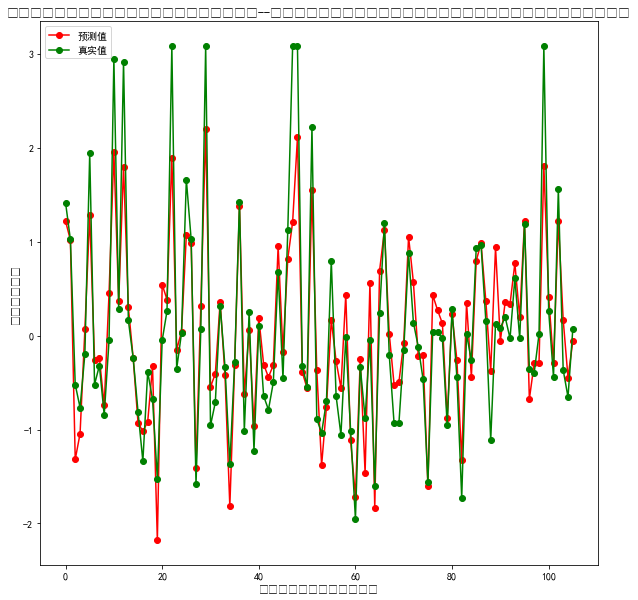

In [19]:
plt.figure(figsize=(10,10))
plt.plot(result,"ro-",label="预测值")
plt.plot(test_y.values,"go-",label="真实值")
 
plt.title("波士顿房价预测--梯度下降实现线性回归")
plt.xlabel("样本序号")
plt.ylabel("房价")
plt.legend()
plt.show()

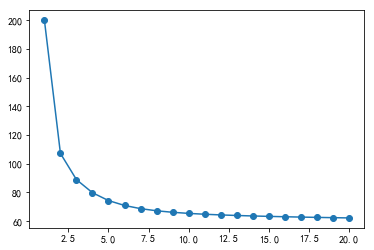

In [20]:
# 绘制累计误差值
 
plt.plot(range(1,lr.times+1),lr.loss_,"o-")

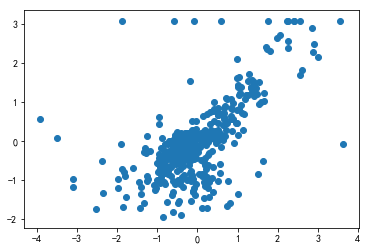

In [21]:
plt.scatter(train_X["RM"],train_y)

In [22]:
display(lr.w_)

array([ 1.45772283e-16, -7.82096101e-02,  3.27417218e-02, -4.18423834e-02,
        7.23915815e-02, -1.22422484e-01,  3.18709730e-01, -9.44094559e-03,
       -2.09320117e-01,  1.04023908e-01, -5.20477318e-02, -1.82216410e-01,
        9.76133507e-02, -3.94395606e-01])

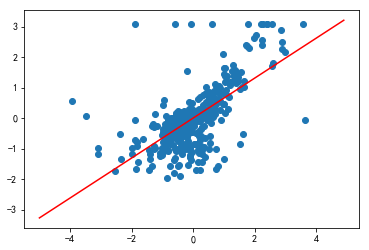

In [23]:
x=np.arange(-5,5,0.1)
y=y=-3.03757020e-16+6.54984608e-01*x
plt.plot(x,y,'r')
plt.scatter(train_X["RM"],train_y)